# Part 1. Collecting Reviews

In [85]:
import requests

from bs4 import BeautifulSoup

In [86]:
r = requests.get('https://www.yelp.com/biz/tesla-san-francisco?osq=Tesla+Dealership')

In [87]:
print(r.status_code)


200


In [88]:
#check result
r.text

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n        <script nonce="a2a83b72">\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFa

In [89]:
# Make the soup
soup = BeautifulSoup(r.text, 'html.parser')

In [90]:
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script nonce="a2a83b72">
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){documen

In [91]:
results=soup.findAll(class_='lemon--p__373c0__3Qnnj text__373c0__2Kxyz comment__373c0__3EKjH text-color--normal__373c0__3xep9 text-align--left__373c0__2XGa-')
print(results) 


[<p class="lemon--p__373c0__3Qnnj text__373c0__2Kxyz comment__373c0__3EKjH text-color--normal__373c0__3xep9 text-align--left__373c0__2XGa-"><span class="lemon--span__373c0__3997G raw__373c0__3rcx7" lang="en">Today was delivery day and we were pretty excited to collect our car. When we arrived we proceeded upstairs where the magic happens. <br/><br/>Jessica H. and Alex were both helping other customers and we were third in line. Even though we waited less than 15 minutes we were told they'd be with us promptly and they thanked us for our patience and for waiting. They made us feel valued and the time passed quickly. When it was our turn, Jessica explained the process, walked us through the documents she'd prepared in advance of our arrival (and even colour coded to make everything both easy and efficient), and explained to us what to expect. <br/><br/>The place was spotless. We saw the staff wearing masks, cleaning surfaces and office supplies after every use and they even had separate 

In [92]:
reviews = [result.text for result in results]

In [93]:
reviews


["Today was delivery day and we were pretty excited to collect our car. When we arrived we proceeded upstairs where the magic happens. Jessica H. and Alex were both helping other customers and we were third in line. Even though we waited less than 15 minutes we were told they'd be with us promptly and they thanked us for our patience and for waiting. They made us feel valued and the time passed quickly. When it was our turn, Jessica explained the process, walked us through the documents she'd prepared in advance of our arrival (and even colour coded to make everything both easy and efficient), and explained to us what to expect. The place was spotless. We saw the staff wearing masks, cleaning surfaces and office supplies after every use and they even had separate cups for clean versus dirty pens. These folks have this down to a science. Our car was ready for us and Alex gave us a mini-tutorial, asked if we needed help and was prepared to answer questions even though we had none. He add

# PART 2 : ANALYZING THE REVIEWS

In [94]:
import pandas as pd


import numpy as np

In [95]:
# Create a pandas dataframe from array
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [96]:
# Calculate word count
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(" ")))

In [97]:
# Calculate character count
df['char_count'] = df['review'].str.len()

In [98]:
def avg_word(review):
    words = review.split()
    return (sum(len(word) for word in words) / len(words))

# Calculate average words
df['avg_word'] = df['review'].apply(lambda x: avg_word(x))

In [99]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Aparajita
[nltk_data]     Gogoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
stop_words = stopwords.words('english')
df['stopword_coun'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

In [101]:
df.head()

,review,word_count,char_count,avg_word,stopword_coun
0,Today was delivery day and we were pretty exci...,306,1730,4.656863,133
1,DREADFUL CUSTOMER SERVICE AND EXPERIENCE My mo...,111,609,4.495495,55
2,The service center here is TERRIBLE. I had a t...,267,1424,4.337079,113
3,Don't take vehicle delivery at this SF service...,201,1122,4.587065,83
4,"Unfortunately, as a recent new Tesla owner, I ...",184,1079,4.864130,74


## 3. Cleaning the data set

In [102]:
# Lower case all words
df['review_lower'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [103]:
# Remove Punctuation
df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]', '')

In [104]:
# Remove Stopwords
df['review_nopunc_nostop'] = df['review_nopunc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [105]:
# Return frequency of values
freq= pd.Series(" ".join(df['review_nopunc_nostop']).split()).value_counts()[:30]

In [106]:
freq.head()

car        53
service    35
tesla      22
get        19
one        14
dtype: int64

In [107]:
other_stopwords = ['get', 'us', 'see', 'use', 'said', 'asked', 'day', 'go' \
  'even', 'ive', 'right', 'left', 'always', 'would', 'told', \
  'get', 'us', 'would', 'get', 'one', 'ive', 'go', 'even', \
  'also', 'ever', 'x', 'take', 'let' ]

In [108]:
df['review_nopunc_nostop_nocommon'] = df['review_nopunc_nostop'].apply(lambda x: "".join(" ".join(x for x in x.split() if x not in other_stopwords)))

In [109]:
df.head()

,review,word_count,char_count,avg_word,stopword_coun,review_lower,review_nopunc,review_nopunc_nostop,review_nopunc_nostop_nocommon
0,Today was delivery day and we were pretty exci...,306,1730,4.656863,133,today was delivery day and we were pretty exci...,today was delivery day and we were pretty exci...,today delivery day pretty excited collect car ...,today delivery pretty excited collect car arri...
1,DREADFUL CUSTOMER SERVICE AND EXPERIENCE My mo...,111,609,4.495495,55,dreadful customer service and experience my mo...,dreadful customer service and experience my mo...,dreadful customer service experience mom came ...,dreadful customer service experience mom came ...
2,The service center here is TERRIBLE. I had a t...,267,1424,4.337079,113,the service center here is terrible. i had a t...,the service center here is terrible i had a ti...,service center terrible tire needed patched ta...,service center terrible tire needed patched ta...
3,Don't take vehicle delivery at this SF service...,201,1122,4.587065,83,don't take vehicle delivery at this sf service...,dont take vehicle delivery at this sf service ...,dont take vehicle delivery sf service center t...,dont vehicle delivery sf service center delive...
4,"Unfortunately, as a recent new Tesla owner, I ...",184,1079,4.864130,74,"unfortunately, as a recent new tesla owner, i ...",unfortunately as a recent new tesla owner i ha...,unfortunately recent new tesla owner agree maj...,unfortunately recent new tesla owner agree maj...


## 4. Lemmatize the Reviews

In [110]:
# Import textblob
from textblob import Word
nltk.download('wordnet')

# Lemmatize final review format
df['cleaned_review'] = df['review_nopunc_nostop_nocommon']\
.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to C:\Users\Aparajita
[nltk_data]     Gogoi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [111]:
print('Base review\n', df['review'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['cleaned_review'][0])

Base review
 Today was delivery day and we were pretty excited to collect our car. When we arrived we proceeded upstairs where the magic happens. Jessica H. and Alex were both helping other customers and we were third in line. Even though we waited less than 15 minutes we were told they'd be with us promptly and they thanked us for our patience and for waiting. They made us feel valued and the time passed quickly. When it was our turn, Jessica explained the process, walked us through the documents she'd prepared in advance of our arrival (and even colour coded to make everything both easy and efficient), and explained to us what to expect. The place was spotless. We saw the staff wearing masks, cleaning surfaces and office supplies after every use and they even had separate cups for clean versus dirty pens. These folks have this down to a science. Our car was ready for us and Alex gave us a mini-tutorial, asked if we needed help and was prepared to answer questions even though we had n

## 5. Sentiment Analysis

In [112]:
# Calculate polarity
from textblob import TextBlob
df['polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[0])

In [113]:
# Calculate subjectivity
df['subjectivity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[1])

In [114]:
df[['cleaned_review', 'polarity', 'subjectivity']].head()

,cleaned_review,polarity,subjectivity
0,today delivery pretty excited collect car arri...,0.291106,0.667274
1,dreadful customer service experience mom came ...,-0.213333,0.745000
2,service center terrible tire needed patched ta...,0.007917,0.427381
3,dont vehicle delivery sf service center delive...,0.114646,0.429747
4,unfortunately recent new tesla owner agree maj...,0.050758,0.294886


In [115]:
df.to_csv(r'F:\cleaned_review.csv',index=True)


In [161]:
df.to_html(r'F:\cleaned_review.html',index=True)


In [116]:
df.to_csv(r'F:\subjectivity.csv',index=True)

In [117]:
df.to_csv(r'F:\polarity.csv',index=True)


## 6. Data Visualization

In [118]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

In [119]:
sample_data = pd.read_csv('cleaned_review.csv')


In [120]:
sample_data 

,Serial_No,review,word_count,char_count,avg_word,stopword_coun,review_lower,review_nopunc,review_nopunc_nostop,review_nopunc_nostop_nocommon,cleaned_review,polarity,subjectivity
0,0,Today was delivery day and we were pretty exci...,306,1730,4.656863,133,today was delivery day and we were pretty exci...,today was delivery day and we were pretty exci...,today delivery day pretty excited collect car ...,today delivery pretty excited collect car arri...,today delivery pretty excited collect car arri...,0.291106,0.667274
1,1,DREADFUL CUSTOMER SERVICE AND EXPERIENCE My mo...,111,609,4.495495,55,dreadful customer service and experience my mo...,dreadful customer service and experience my mo...,dreadful customer service experience mom came ...,dreadful customer service experience mom came ...,dreadful customer service experience mom came ...,-0.213333,0.745000
2,2,The service center here is TERRIBLE. I had a t...,267,1424,4.337079,113,the service center here is terrible. i had a t...,the service center here is terrible i had a ti...,service center terrible tire needed patched ta...,service center terrible tire needed patched ta...,service center terrible tire needed patched ta...,0.007917,0.427381
3,3,The service center here is TERRIBLE. I had a t...,298,1615,4.422819,127,the service center here is terrible. i had a t...,the service center here is terrible i had a ti...,service center terrible tire needed patched ta...,service center terrible tire needed patched ta...,service center terrible tire needed patched ta...,0.007540,0.426077
4,4,Don't take vehicle delivery at this SF service...,201,1122,4.587065,83,don't take vehicle delivery at this sf service...,dont take vehicle delivery at this sf service ...,dont take vehicle delivery sf service center t...,dont vehicle delivery sf service center delive...,dont vehicle delivery sf service center delive...,0.114646,0.429747
5,5,"Unfortunately, as a recent new Tesla owner, I ...",184,1079,4.864130,74,"unfortunately, as a recent new tesla owner, i ...",unfortunately as a recent new tesla owner i ha...,unfortunately recent new tesla owner agree maj...,unfortunately recent new tesla owner agree maj...,unfortunately recent new tesla owner agree maj...,0.050758,0.294886
6,6,I had a bad experience. Technician names Adam ...,57,320,4.631579,26,i had a bad experience. technician names adam ...,i had a bad experience technician names adam w...,bad experience technician names adam rude arro...,bad experience technician names adam rude arro...,bad experience technician name adam rude arrog...,-0.280000,0.386667
7,7,Adding to the bad reviews of this location...I...,123,692,4.544715,46,adding to the bad reviews of this location...i...,adding to the bad reviews of this locationim c...,adding bad reviews locationim considering buyi...,adding bad reviews locationim considering buyi...,adding bad review locationim considering buyin...,-0.110417,0.500694
8,8,I bought a Model X with a warranty from Tesla ...,144,761,4.243056,55,i bought a model x with a warranty from tesla ...,i bought a model x with a warranty from tesla ...,bought model x warranty tesla sf warranty cour...,bought model warranty tesla sf warranty course...,bought model warranty tesla sf warranty course...,0.105556,0.508333
9,9,Our TeslaX is 2.5 years old. It has spent mor...,307,1766,4.724026,114,our teslax is 2.5 years old. it has spent more...,our teslax is 25 years old it has spent more t...,teslax 25 years old spent time shop melania tr...,teslax 25 years old spent time shop melania tr...,teslax 25 year old spent time shop melania tru...,0.057300,0.466667


## Data Virtualization

In [121]:
type(sample_data)

pandas.core.frame.DataFrame

(array([4., 2., 0., 3., 1., 0., 1., 2., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
        1., 0., 1.]),
 array([ 218. ,  346.4,  474.8,  603.2,  731.6,  860. ,  988.4, 1116.8,
        1245.2, 1373.6, 1502. , 1630.4, 1758.8, 1887.2, 2015.6, 2144. ,
        2272.4, 2400.8, 2529.2, 2657.6, 2786. ]),
 <a list of 20 Patch objects>)

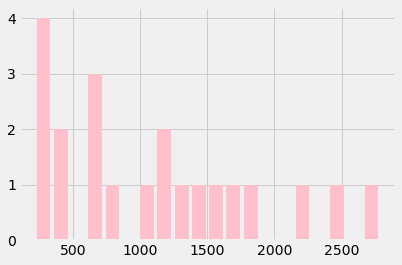

In [154]:
plt.hist(sample_data.char_count,bins=20,rwidth = 0.80 , color= 'pink')

(array([5., 1., 2., 1., 1., 1., 1., 1., 1., 1., 3., 0., 0., 0., 1., 0., 1.,
        0., 0., 1.]),
 array([ 39. ,  64.1,  89.2, 114.3, 139.4, 164.5, 189.6, 214.7, 239.8,
        264.9, 290. , 315.1, 340.2, 365.3, 390.4, 415.5, 440.6, 465.7,
        490.8, 515.9, 541. ]),
 <a list of 20 Patch objects>)

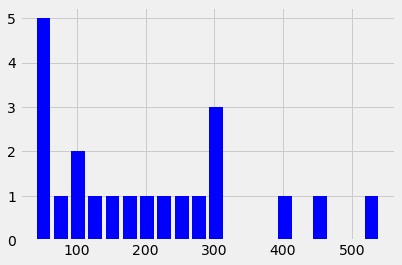

In [155]:
plt.hist(sample_data.word_count,bins=20,rwidth = 0.80 , color= 'blue')

(array([4., 2., 2., 2., 0., 3., 0., 1., 2., 2., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1.]),
 array([ 12.  ,  24.35,  36.7 ,  49.05,  61.4 ,  73.75,  86.1 ,  98.45,
        110.8 , 123.15, 135.5 , 147.85, 160.2 , 172.55, 184.9 , 197.25,
        209.6 , 221.95, 234.3 , 246.65, 259.  ]),
 <a list of 20 Patch objects>)

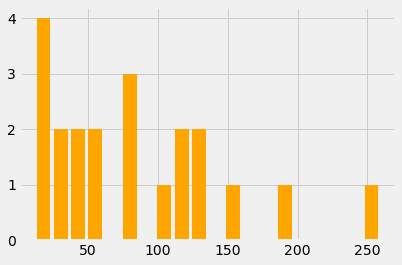

In [156]:
plt.hist(sample_data.stopword_coun,bins=20,rwidth = 0.80 , color= 'orange')

(array([2., 1., 2., 3., 1., 2., 3., 2., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 1.]),
 array([4.15157117, 4.21420537, 4.27683958, 4.33947379, 4.402108  ,
        4.4647422 , 4.52737641, 4.59001062, 4.65264483, 4.71527903,
        4.77791324, 4.84054745, 4.90318166, 4.96581587, 5.02845007,
        5.09108428, 5.15371849, 5.2163527 , 5.2789869 , 5.34162111,
        5.40425532]),
 <a list of 20 Patch objects>)

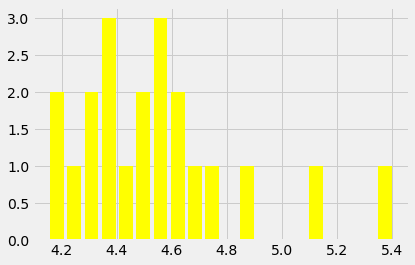

In [157]:
plt.hist(sample_data.avg_word,bins=20,rwidth = 0.80 , color= 'yellow')

In [159]:
#plt.plot(sample_data.polarity)
#plt.show()

In [141]:
#plt.hist(sample_data.polarity,bins = 20 ,rwidth = 0.80 , color='g')

In [146]:
#plt.plot(sample_data.subjectivity)
#plt.show()

In [147]:
#plt.hist(sample_data.subjectivity,bins = 20 ,rwidth = 0.80 , color='r')

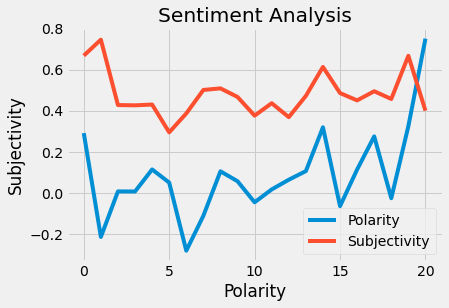

In [130]:
plt.plot(sample_data.Serial_No,sample_data.polarity,sample_data.subjectivity )
plt.legend(['Polarity', 'Subjectivity'])
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis')

plt.show()

Text(0.5, 0, 'polarity')

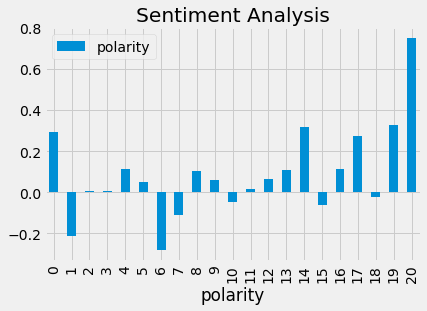

In [133]:
plotdata = pd.DataFrame({
    "polarity":[0.291106443,-0.213333333,0.007916667,0.007539683,0.114646,0.050758,-0.28,-0.11042,0.105556,0.0573,
                 -0.04485,0.017576,0.064674,0.106578,0.319444,-0.06364,0.114286,0.275,-0.0251,0.325,0.75],
    
                      } 
  
                         
                      )
plotdata.plot(kind="bar")
plt.title("Sentiment Analysis")
plt.xlabel("polarity")


Text(0, 0.5, 'subjectivity')

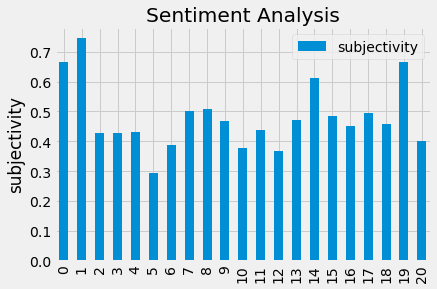

In [137]:
plotdata = pd.DataFrame({
    
    "subjectivity":[0.667273576,0.745,0.427380952,0.426077098,0.429747475,0.294886364,0.386666667,0.500694444,
                    0.508333333,0.466666667,0.375980392,0.436363636,0.36865942,0.471905737,0.6125,
                    0.4856060610,0.45,0.494444444,0.456906158,0.666666667,0.4] 
                       
                       })
   
plotdata.plot(kind="bar")
plt.title("Sentiment Analysis")

plt.ylabel("subjectivity")

Text(0, 0.5, 'subjectivity')

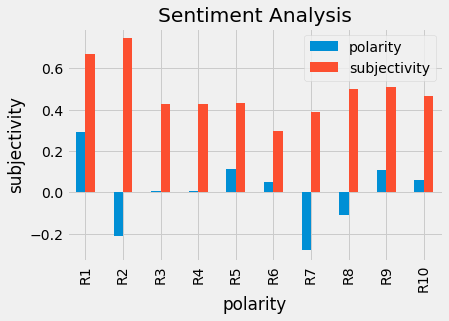

In [153]:
plotdata = pd.DataFrame({
    "polarity":[0.291106443,-0.213333333,0.007916667,0.007539683,0.114646,0.050758,-0.28,-0.11042,0.105556,0.0573],
    "subjectivity":[0.667273576,0.745,0.427380952,0.426077098,0.429747475,0.294886364,0.386666667,0.500694444,
                    0.508333333,0.466666667]
                    },
    index=["R1","R2","R3","R4","R5","R6","R7","R8","R9","R10"]
                    )
plotdata.plot(kind="bar")
plt.title("Sentiment Analysis")
plt.xlabel("polarity")
plt.ylabel("subjectivity")
    
